In [31]:
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r'C:\Users\zishe\Desktop\TIAS\thesis\final data\final_data.xlsx')
df.head()

,OCC_CODE,OCC_TITLE,year,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,...,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,TOT_EMP,EMP_PRSE,OCC_SEC,SecMean,H_MEAN_SEC_ratio
0,11-9039,"Education Administrators, All Other",2010,37.259998,77500.0,1.2,17.920000,23.049999,32.060001,45.410000,...,37270.0,47940.0,66680.0,94450.0,128810.0,13450.0,2.8,11,53.616684,0.694933
1,11-3051,Industrial Production Managers,2010,58.090000,120830.0,1.7,40.619999,49.450001,57.990002,65.870003,...,84490.0,102860.0,120620.0,137000.0,152650.0,200.0,0.0,11,53.616684,1.083431
2,11-9161,Emergency Management Directors,2010,26.410000,54930.0,0.8,12.320000,18.070000,25.000000,33.419998,...,25630.0,37580.0,52010.0,69500.0,89850.0,6710.0,2.3,11,53.616684,0.492571
3,11-9039,"Education Administrators, All Other",2010,41.290001,85880.0,1.1,24.209999,30.510000,39.340000,50.450001,...,50350.0,63460.0,81820.0,104940.0,128250.0,14650.0,1.9,11,53.616684,0.770096
4,11-9071,Gaming Managers,2010,37.080002,77120.0,1.4,20.000000,25.670000,33.259998,43.560001,...,41600.0,53400.0,69190.0,90610.0,121180.0,2170.0,3.6,11,53.616684,0.691576


In [32]:
def dealstr(s):
    return s.lower().replace('and', '').replace(',', '').split()

df['OCC_TITLE'].map(dealstr).explode().value_counts()[:10]

workers        10169
other           8778
all             8274
operators       7039
technicians     5036
managers        4268
except          4256
clerks          3728
machine         3660
repairers       3214
Name: OCC_TITLE, dtype: int64

In [33]:
df['title'] = df['OCC_TITLE'].str.lower().replace('and', '').replace(',', '')

titles = list(df['OCC_TITLE'].map(dealstr).explode().value_counts()[:10].index)
titles = [t for t in titles if t not in ['other', 'all', 'except']]
df['title'] = df['title'].apply(
    lambda x:[s for s in titles if s in x][0] 
    if any([s in x for s in titles]) 
    else 'other'
)

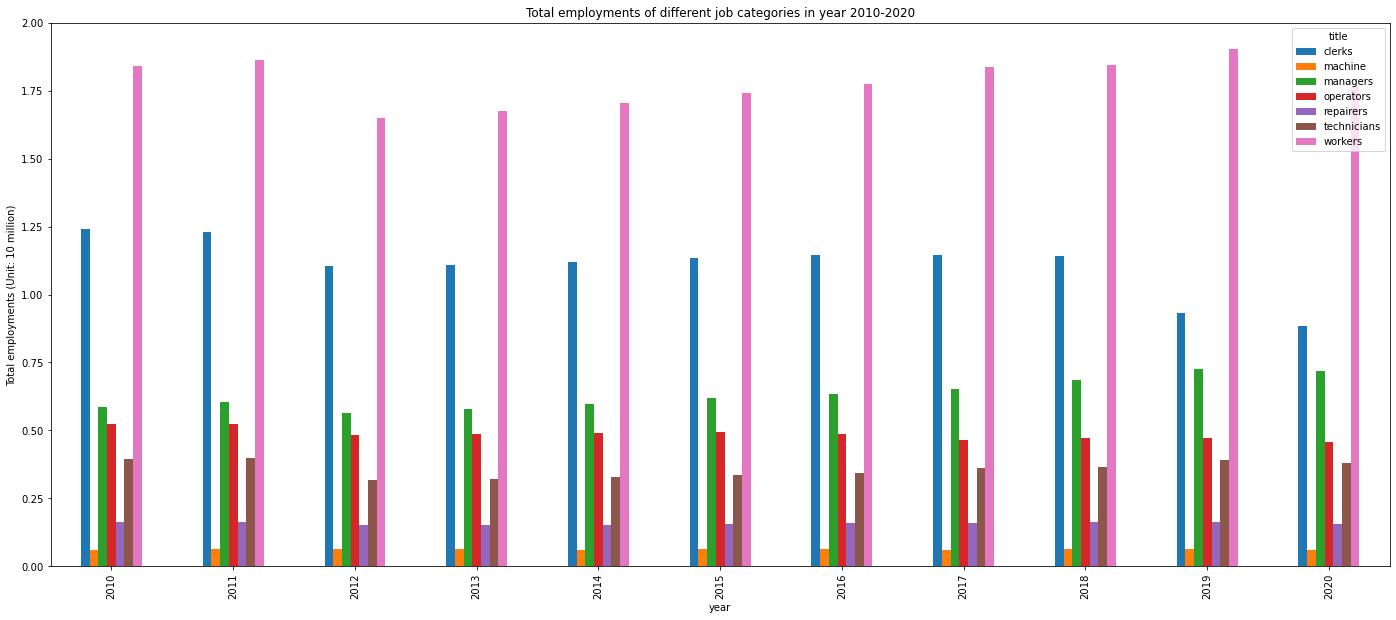

In [34]:
temp = df.groupby(['year', 'title'])['TOT_EMP'].sum().unstack() / 1e7

temp.drop('other', axis=1).plot(
    kind='bar', figsize=(24, 10)
)
plt.ylabel('Total employments (Unit: 10 million)')
plt.title('Total employments of different job categories in year 2010-2020')
plt.savefig('output.png', dpi=500)

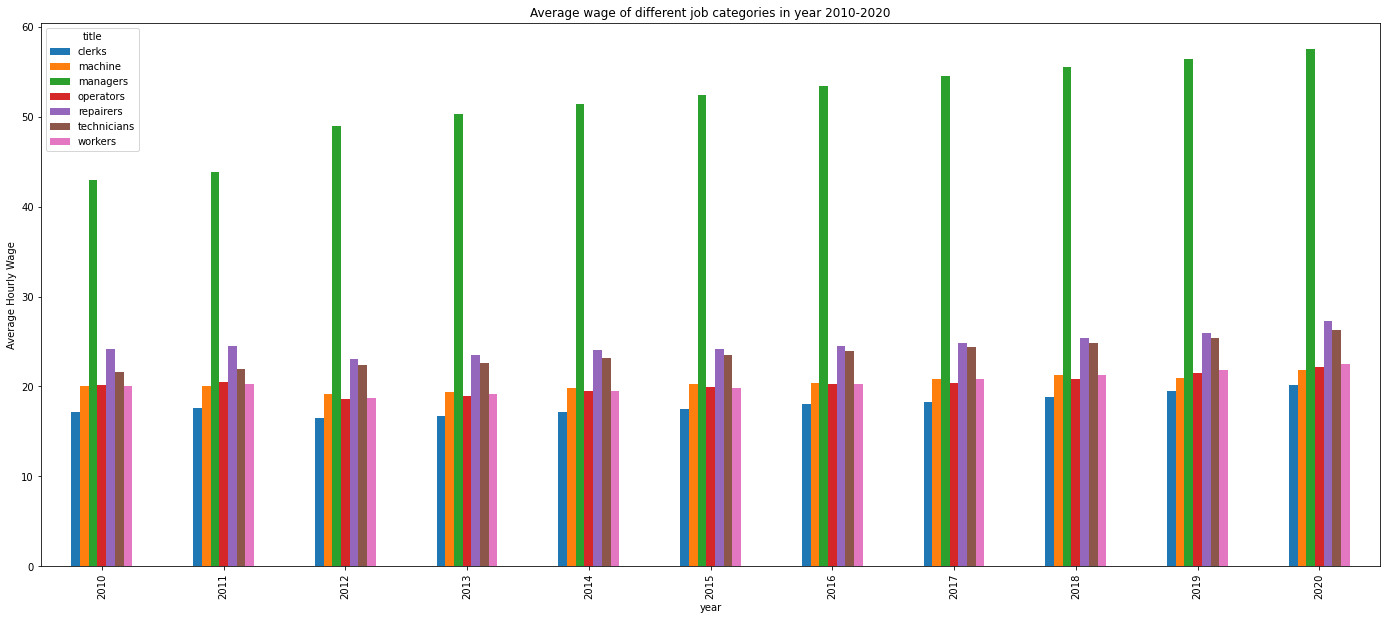

In [35]:
temp = df.groupby(['year', 'title'])['H_MEAN'].mean().unstack() 

temp.drop('other', axis=1).plot(
    kind='bar', figsize=(24, 10)
)
plt.ylabel('Average Hourly Wage')
plt.title('Average wage of different job categories in year 2010-2020')
plt.savefig('output.png', dpi=500)

In [36]:
temp.describe()

title,clerks,machine,managers,operators,other,repairers,technicians,workers
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,17.958590,20.344023,51.585433,20.249713,28.369956,24.670080,23.648222,20.388082
std,1.157152,0.809113,4.793441,1.042024,1.493778,1.178099,1.487918,1.157569
min,16.494182,19.107237,42.992231,18.579662,26.399940,23.018586,21.612039,18.731011
25%,17.170064,19.923433,49.626635,19.686460,27.338180,24.109503,22.509630,19.648070
50%,17.626701,20.241447,52.362874,20.272388,27.933848,24.471300,23.487893,20.220296
75%,18.602507,20.867454,55.036674,20.678022,29.231219,25.112856,24.607148,21.072985
max,20.140331,21.825942,57.579095,22.136613,31.207306,27.240235,26.284216,22.544945


In [37]:
temp.to_excel('sum.xlsx')

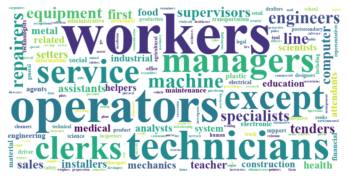

In [38]:
from wordcloud import WordCloud

f = ' '.join(df['OCC_TITLE'].map(dealstr).explode().str.strip().values)
wordcloud = WordCloud( font_path='C:\\windows\\Fonts\\timesbd.ttf',
                    background_color='white', 
                    collocations=False,
                    scale=2).generate(f)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figsize = (10,20)
plt.savefig('pic.png', 
            dpi=1500)
        

In [39]:
print(f)

education administrators all other industrial production managers emergency management directors education administrators all other gaming managers administrative services managers human resources managers general operations managers financial managers computer information systems managers chief executives education administrators all other managers all other marketing managers legislators chief executives transportation storage distribution managers food service managers purchasing managers public relations fundraising managers architectural engineering managers social community service managers purchasing managers farmers ranchers other agricultural managers natural sciences managers sales managers computer information systems managers education administrators postsecondary sales managers human resources managers construction managers human resources managers general operations managers computer information systems managers postmasters mail superintendents financial managers educatio

In [40]:
a=f.split()

In [41]:
from collections import *
ignore = ['other', 'all', 'except','of']
counts_a = collections.Counter(a) 
for word in ignore:
    if word in counts_a:
        del counts_a[word]

In [42]:
counts = pd.DataFrame(counts_a.most_common(20),
                             columns=['words', 'count'])
print(counts)

          words  count
0       workers  10169
1     operators   7039
2   technicians   5036
3      managers   4268
4        clerks   3728
5       machine   3660
6     repairers   3214
7     engineers   3159
8     equipment   3155
9       service   3049
10  specialists   2953
11  supervisors   2777
12      tenders   2613
13   first-line   2557
14     computer   2459
15        sales   2046
16   installers   1990
17      setters   1982
18   assistants   1941
19     teachers   1896


Text(0.5, 1.0, 'Most Frequent Words in Occupation Titles by Count')

<Figure size 576x576 with 0 Axes>

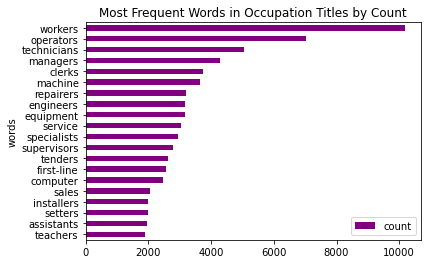

In [43]:
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_title("Most Frequent Words in Occupation Titles by Count")
fig = plt.figure(figsize=(8, 8))
counts.sort_values(by='count').plot.barh(x='words',
                      y='count',  color="purple")

plt.title("Most Frequent Words in Occupation Titles by Count")

In [44]:
plt.show()